In [1]:
import wellmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from kbkbio.plate_reader import BiotekExperiment
from scipy.optimize import curve_fit
from dataclasses import dataclass
from numpy import inf

def load_plate_reader(path):
    expt = BiotekExperiment(path)
    return expt.kinetic[600]

df = wellmap.load(
        '20220323_b1h_s4_s5_s16_s22.toml',
        data_loader=load_plate_reader,
        merge_cols=True,
        path_guess='{0.stem}.xlsx',
)
df = df.query('well == "D3"')
df

,well,well0,row,col,row_i,col_j,path,media,strain,dilution,temperature_C,time_min,wavelength_nm,read
980,D3,D03,D,3,3,2,/home/kale/research/projects/201904_bind_dna/d...,NM + His+Ura + Carb+Kan,s4,3.0,37.0,29,600,0.085
981,D3,D03,D,3,3,2,/home/kale/research/projects/201904_bind_dna/d...,NM + His+Ura + Carb+Kan,s4,3.0,37.0,59,600,0.085
982,D3,D03,D,3,3,2,/home/kale/research/projects/201904_bind_dna/d...,NM + His+Ura + Carb+Kan,s4,3.0,37.0,89,600,0.085
983,D3,D03,D,3,3,2,/home/kale/research/projects/201904_bind_dna/d...,NM + His+Ura + Carb+Kan,s4,3.0,37.0,119,600,0.085
984,D3,D03,D,3,3,2,/home/kale/research/projects/201904_bind_dna/d...,NM + His+Ura + Carb+Kan,s4,3.0,37.1,149,600,0.086
985,D3,D03,D,3,3,2,/home/kale/research/projects/201904_bind_dna/d...,NM + His+Ura + Carb+Kan,s4,3.0,37.0,179,600,0.086
986,D3,D03,D,3,3,2,/home/kale/research/projects/201904_bind_dna/d...,NM + His+Ura + Carb+Kan,s4,3.0,37.1,209,600,0.086
987,D3,D03,D,3,3,2,/home/kale/research/projects/201904_bind_dna/d...,NM + His+Ura + Carb+Kan,s4,3.0,37.0,239,600,0.086
988,D3,D03,D,3,3,2,/home/kale/research/projects/201904_bind_dna/d...,NM + His+Ura + Carb+Kan,s4,3.0,37.0,269,600,0.087
989,D3,D03,D,3,3,2,/home/kale/research/projects/201904_bind_dna/d...,NM + His+Ura + Carb+Kan,s4,3.0,37.0,299,600,0.088


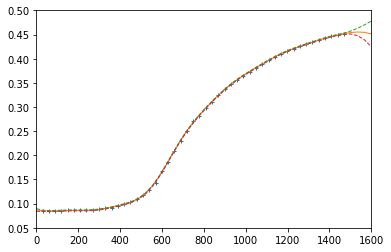

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

kernel = RBF(length_scale=1e2, length_scale_bounds=(1e1, 1e4)) + WhiteKernel()
gpr = GaussianProcessRegressor(
    kernel=kernel,
    normalize_y=True,
)

x = df['time_min'].values.reshape(-1, 1)
y = df['read'].values.reshape(-1, 1)

gpr.fit(x, y)

x_fit = np.linspace(0, 1600).reshape(-1, 1)
y_fit, y_std = gpr.predict(x_fit, return_std=True)
y_std = y_std.reshape(-1, 1)

plt.plot(x, y, '+')
plt.plot(x_fit, y_fit)
plt.plot(x_fit, y_fit+y_std, '--')
plt.plot(x_fit, y_fit-y_std, '--')

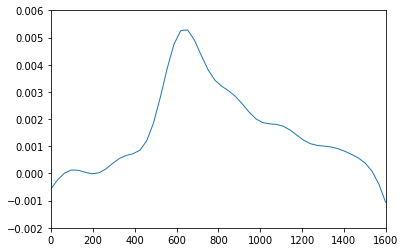

In [31]:
class BacterialGrowthRegressor:
    # Make my own class, because the derivative depends 
    # on the kernel, so all that has to be internal.
    pass

def gp_grad(gpr, x_star): 
    X = gpr.X_train_.ravel()
    K = gpr.kernel_
    l = K.k1.length_scale
    a = gpr.alpha_

    dx = X - x_star
    f = np.exp(-(dx**2) / (2*l**2))
    df = f * dx / l**2
    
    return df @ a

plt.plot(x_fit, [gp_grad(gpr, x) for x in x_fit])

In [33]:
from scipy.optimize import minimize_scalar

minimize_scalar(lambda x: -gp_grad(gpr, x), bounds=(0, 1500), method='bounded')

     fun: array([-0.0053281])
 message: 'Solution found.'
    nfev: 22
     nit: 22
  status: 0
 success: True
       x: array([638.09728695])